# Regresión Lineal - Ejercicio Propuesto

Acaba de obtener un contrato con una empresa de comercio electrónico con sede en la ciudad de Nueva York que vende ropa en línea, pero también tienen sesiones de asesoramiento sobre vestimenta y estilo en la tienda. Los clientes entran a la tienda, tienen sesiones / reuniones con un estilista personal, luego pueden irse a sus casas y pedir, ya sea en una aplicación móvil o en el sitio web, la ropa que desean.

La compañía está tratando de decidir si enfocar sus esfuerzos en la experiencia de su aplicación móvil o en su sitio web. ¡Te contrataron para ayudarlos a tomar las decisiones! ¡Empecemos!

Simplemente siga los pasos a continuación para analizar los datos de los clientes (son datos inventados, no se preocupe).

## Importación de librerias
** Importar pandas, numpy, matplotlib,y seaborn. Luego establezca %matplotlib inline 
(Importará sklearn a medida que lo necesite.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Recuperar los datos

Trabajaremos con el archivo csv de clientes de comercio electrónico de la compañía. Tiene información del Cliente, como Correo electrónico, Dirección y su color Avatar. También tiene columnas de valores numéricos:

* Avg. Session Length: Promedio de asesoramiento de estilo en la tienda.
* Time on App: Tiempo promedio dedicado a la aplicación en minutos.
* Time on Website: Tiempo promedio dedicado al sitio web en minutos.
* Length of Membership: Cuántos años el cliente ha sido miembro. 

** Lea en el archivo csv de clientes de comercio electrónico como un DataFrame llamado clientes.**

In [2]:
Ecomerce = pd.read_csv('Ecommerce Customers.csv')

**Revise las primeras filas de customers, y reviselas con los métodos info() y describe().**

In [3]:
Ecomerce.head(10)

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   
5         alvareznancy@lucas.biz   
6          katherine20@yahoo.com   
7             awatkins@yahoo.com   
8    vchurch@walter-martinez.com   
9               bonnie69@lin.biz   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
5  645 Martha Park Apt. 611\nJeffreychester, MN 6...       FloralWhite   
6  68388 Reyes Lights Suite 692\nJosephbury, WV 9...     DarkSlateBlue   
7              Unit 6538 Box 8980\nDPO AP 09026-4941              Aqua   
8             860 Lee Key\nWest Debra, SD 97450-0495            Salmon   
9              PSC 2734, Box 5255\nAPO AA 98456-7482             Brown   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   
5            33.871038    12.026925        34.476878              5.493507   
6            32.021596    11.366348        36.683776              4.685017   
7            32.739143    12.351959        37.373359              4.434273   
8            33.987773    13.386235        37.534497              3.273434   
9            31.936549    11.814128        37.145168              3.202806   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092  
5           637.102448  
6           521.572175  
7           549.904146  
8           570.200409  
9           427.199385

In [4]:
Ecomerce.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [5]:
Ecomerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análsis de Datos Exploratorios

**¡Exploremos los datos!**

Para el resto del ejercicio, solo utilizaremos los datos numéricos del archivo csv.
___
**Use seaborn para crear una gráfica conjunta para comparar las columnas Time on Website y Yearly Amount Spent. ¿Tiene sentido la correlación?**

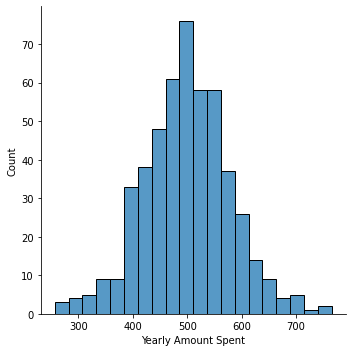

In [6]:
sns.displot(Ecomerce['Yearly Amount Spent'])

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=Ecomerce)

** Haz lo mismo pero con la columna Time on App en su lugar. **

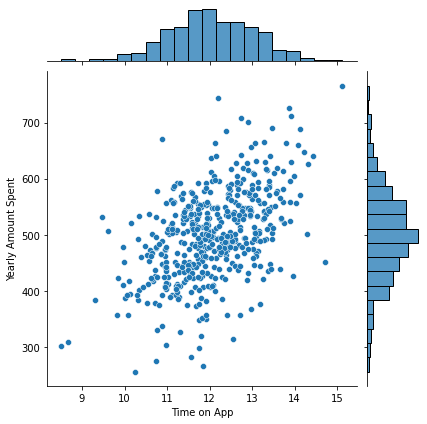

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=Ecomerce)

** Use jointplot para crear un gráfico 2D hex bin comparando Time on App y Length of Membership.**

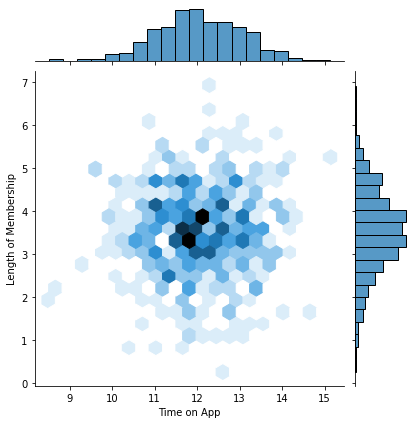

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership',data=Ecomerce,kind='hex')

**Exploremos este tipo de relaciones en todo el conjunto de datos. Usa [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot)  para recrear la gráfica de abajo. (No te preocupes por los colores)...Exploremos este tipo de relaciones en todo el conjunto de datos.**

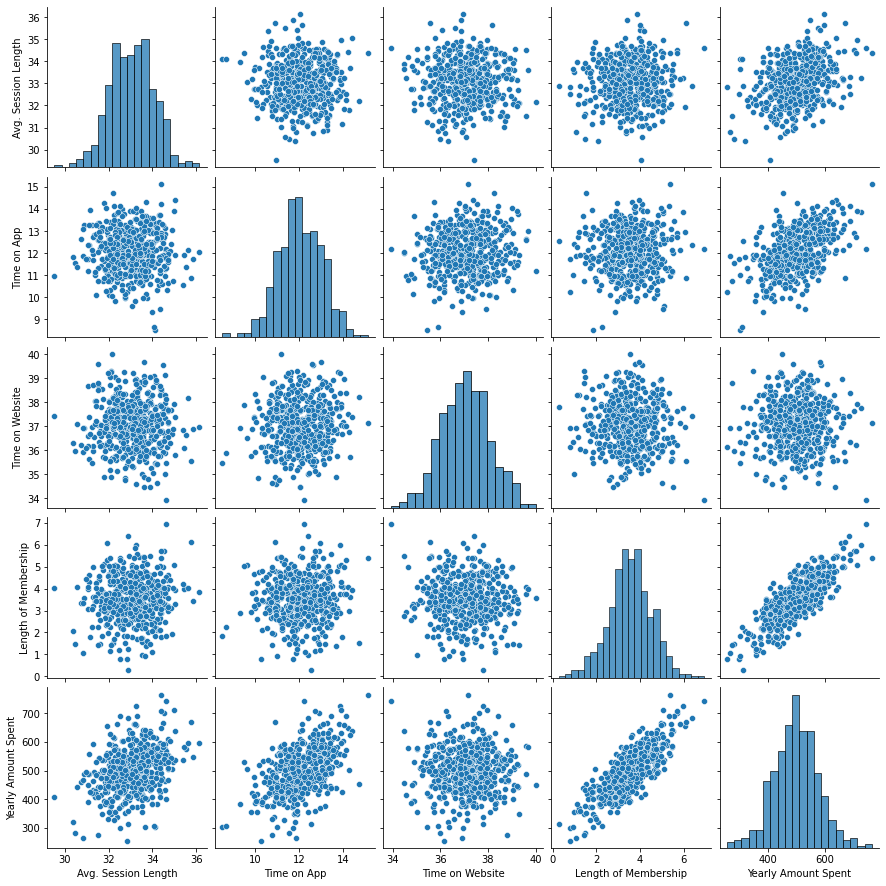

In [15]:
sns.pairplot(Ecomerce,diag_kind='hist')

**Basado en esta trama, ¿cuál parece ser la característica más correlacionada con la cantidad anual gastada?**

In [ ]:
#La duracion de la membresia

**Cree un diagrama de modelo lineal (utilizando lmplot de seaborn) de Yearly Amount Spent vs. Length of Membership. **

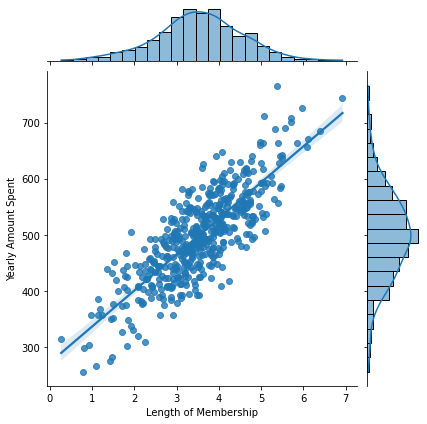

In [16]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=Ecomerce,kind='reg')

## Datos de entrenamiento y prueba

Ahora que hemos explorado un poco los datos, sigamos adelante y dividamos los datos en conjuntos de entrenamiento y prueba. **Establezca una variable X igual a las características numéricas de los clientes y una variable y igual a la columna "Cantidad gastada anual".**

In [30]:
Ecomerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [46]:
X_ent = Ecomerce[['Avg. Session Length','Time on App','Time on Website','Length of Membership']] 
Y_ent = Ecomerce['Yearly Amount Spent']

** Use model_selection.train_test_split de sklearn para dividir los datos en el conjunto de entrenamiento y prueba. Establezca test_size=0.3 y random_state=101**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train , y_test = train_test_split(X_ent, Y_ent,test_size=0.3,random_state=101)

## Entrenamiento del modelo

¡Ahora es el momento de entrenar a su modelo con nuestros datos de entrenamiento!

** Importar LinearRegression desde sklearn.linear_model **

In [49]:
from sklearn.linear_model import LinearRegression

**Crear una instancia del modelo LinearRegression() llamado lm.**

In [50]:
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

** Entrenar/ajustar lm con los datos de entrenamiento.**

In [51]:
lm.fit(x_train,y_train)

LinearRegression(n_jobs=1)

In [52]:
print(lm.intercept_)

-1047.9327822502391


**Imprima los coeficientes del modelo**

In [53]:
coef =  pd.DataFrame(lm.coef_,X_ent.columns,columns=['Coeficiente'])
coef

Coeficiente
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

## Predicción con los datos de prueba
Ahora que hemos ajustado nuestro modelo, ¡evaluemos su rendimiento prediciendo los valores de prueba!

** Use lm.predict () para predecir el conjunto X_test de los datos.**

In [54]:
predict = lm.predict(x_test)
predict

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

** Cree un diagrama de dispersión de los valores de prueba reales frente a los valores predichos. **

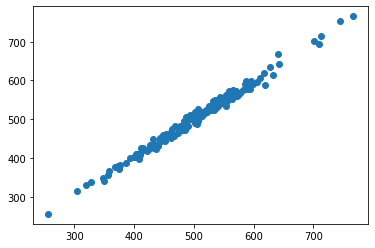

In [55]:
plt.scatter(y_test,predict)

## Evaluación del modelo

Evaluemos el rendimiento de nuestro modelo calculando la suma residual de cuadrados y la puntuación de varianza explicada (R ^ 2).

** Calcule el error absoluto promedio, el error cuadrado promedio y la raíz del error cuadrático promedio.**

In [57]:
from sklearn import metrics
print(f'MAE: {metrics.mean_absolute_error(y_test,predict)}')
print(f'MSE: {metrics.mean_squared_error(y_test,predict)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,predict))}')

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


## Residuales

Deberías haber obtenido un modelo muy bueno con un buen ajuste. Exploremos rápidamente los residuos para asegurarnos de que todo esté bien con nuestros datos.

**Trace un histograma de los residuos y asegúrese de que se vea distribuido normalmente. Utilice ya sea distplot de seaborn o simplemente plt.hist ()**

/home/alex/Documentos/ApuntesSM/CICLO-VII/IA/Parte_practica/env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

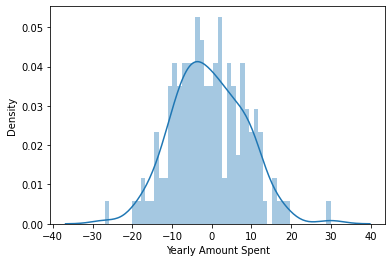

In [60]:
sns.distplot((y_test - predict),bins=50)

## Conclusión
Todavía queremos averiguar la respuesta a la pregunta original, ¿centramos nuestros esfuerzos en el desarrollo de aplicaciones móviles o sitios web? O tal vez eso realmente no importa, y el Tiempo de Membresía es lo que es realmente importante. Veamos si podemos interpretar los coeficientes para obtener una idea.

** Recrea el dataframe de abajo. **

In [62]:
coef

Coeficiente
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

**¿Cómo puedes interpretar estos coeficientes?**

- Si se mantienen las otras caracteristicas, un incremento de 1 unidad en **Avg. Session Length** esta asociado con un **incremento de \$25.98 en Yearly Amount Spent**
- Si se mantienen las otras caracteristicas, un incremento de 1 unidad en **Time on App** esta asociado con un **incremento de \$38.59 en Yearly Amount Spent**
- Si se mantienen las otras caracteristicas, un incremento de 1 unidad en **Time on Website** esta asociado con un **incremento de \$0.19 en Yearly Amount Spent**
- Si se mantienen las otras caracteristicas, un incremento de 1 unidad en **Length of Membership** esta asociado con un **incremento de \$61.27 en Yearly Amount Spent**

**¿Crees que la empresa debería centrarse más en su aplicación móvil o en su sitio web?**

Luego de realizar un analisis a los coeficientes podemos deducir que lo mas rentable para la empresa sera centrarse en el desarrollo y mejora del **aplicativo movil**, ya que el aumento del tiempo en la aplicacion aumenta considerablemente la cantidad anual gastada

## ¡Excelente trabajo!